In [7]:
import numpy as np
from scipy.special import legendre, roots_legendre
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import modepy
from functools import partial

In [8]:
qx, qw = roots_legendre(6)
print(qx, qw)

[-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951] [0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]


In [3]:
def f(x):
    # return np.cos(np.pi*x)
    return np.abs(x)

# set k
k = 10

M = np.zeros((k+1, k+1))
qx, qw = roots_legendre(k+1)
F = np.zeros(k+1)

def _phia(i, x):
    w = np.zeros_like(x)
    w[i] = 1
    return lagrange(x, w)
phia = partial(_phia, x=x)

def phib(i):
    return legendre(i) / np.sqrt(2/(2*i+1))
    
phi = phia
for i in range(k+1):
    for j in range(k+1):
        M[i, j] = np.sum(qw * phi(i)(qx) * phi(j)(qx))   # \int_{-1}^{1} phi_i phi_j
    F[i] = np.sum(qw * f(qx) * phi(i)(qx))

In [4]:
a = np.linalg.solve(M, F)

In [5]:
xx = np.linspace(-1, 1, 100)
pk = np.zeros_like(xx)
for i in range(k+1):
    pk += a[i] * phi(i)(xx)

(np.float64(-1.1),
 np.float64(1.1),
 np.float64(-0.05251326540303206),
 np.float64(1.1027785734636768))

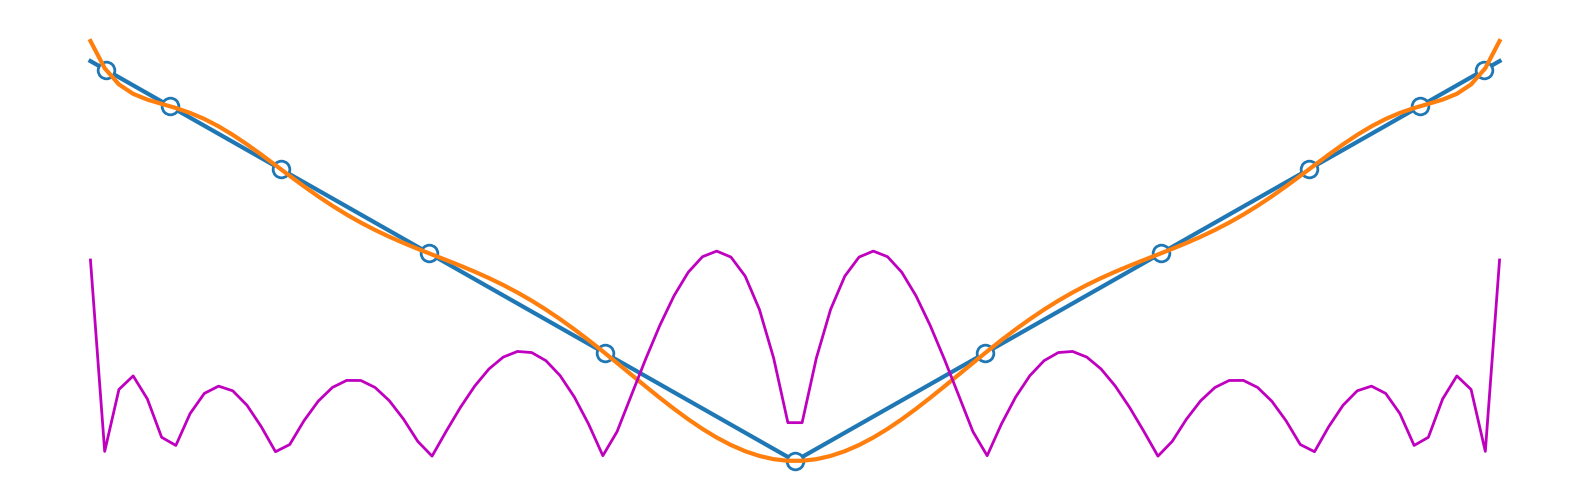

In [6]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(xx, f(xx))
ax.plot(qx, f(qx), 'o', color='tab:blue', markerfacecolor='w')
ax.plot(xx, pk)
ax.plot(xx, 10*np.abs(pk-f(xx)), 'm-', lw=1)
ax.axis('off')